Ya habiendo observado y analizado el problema a resolver, procedo y buscar un modelo que permita resolver el problema de personas elegibles para crédito, juntando toda la información y creando procedimientos que sirvan a futuro.

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import svm
from matplotlib import pyplot as plt
import matplotlib


In [2]:
credit = pd.read_csv('credit_record.csv')  
application = pd.read_csv('application_record.csv') 
credit = pd.DataFrame(credit)
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [3]:
application = pd.DataFrame(application)

In [4]:
dataset_ml = credit.merge(right=application, on='ID')

In [5]:
dataset_ml

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150487,-25,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
777711,5150487,-26,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
777712,5150487,-27,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
777713,5150487,-28,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0


In [6]:
data = dataset_ml.OCCUPATION_TYPE.unique()
data

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [7]:
dataset_ml['OCCUPATION_TYPE'].replace(['NaN', 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], inplace=True)
dataset_ml = dataset_ml.fillna(0)

In [8]:
data1 = dataset_ml.NAME_INCOME_TYPE.unique()
dataset_ml['NAME_INCOME_TYPE'].replace(['Working', 'Commercial associate', 'Pensioner', 'State servant', 'Student'], [0,1,2,3,4], inplace=True)

In [9]:
data2 = dataset_ml.NAME_EDUCATION_TYPE.unique()
dataset_ml['NAME_EDUCATION_TYPE'].replace(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],[0,1,2,3,4], inplace=True)

In [10]:
data3 = dataset_ml.NAME_FAMILY_STATUS.unique()
dataset_ml['NAME_FAMILY_STATUS'].replace(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], [0,1,2,3,4], inplace=True)

In [11]:

data4 = dataset_ml.NAME_HOUSING_TYPE.unique()
data4

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [12]:
dataset_ml['NAME_HOUSING_TYPE'].replace(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'], [0,1,2,3,4,5], inplace=True)
dataset_ml

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,C,M,Y,Y,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,0.0,2.0
1,5008804,-1,C,M,Y,Y,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,0.0,2.0
2,5008804,-2,C,M,Y,Y,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,0.0,2.0
3,5008804,-3,C,M,Y,Y,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,0.0,2.0
4,5008804,-4,C,M,Y,Y,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150487,-25,C,M,Y,N,0,202500.0,0,1,1,1,-19398,-2166,1,0,0,0,6.0,2.0
777711,5150487,-26,C,M,Y,N,0,202500.0,0,1,1,1,-19398,-2166,1,0,0,0,6.0,2.0
777712,5150487,-27,C,M,Y,N,0,202500.0,0,1,1,1,-19398,-2166,1,0,0,0,6.0,2.0
777713,5150487,-28,C,M,Y,N,0,202500.0,0,1,1,1,-19398,-2166,1,0,0,0,6.0,2.0


In [13]:
data5 = dataset_ml.STATUS.unique()
data5

array(['C', '1', '0', 'X', '5', '4', '3', '2'], dtype=object)

In [14]:
dataset_ml['STATUS'].replace(['0', '1', '2',
       '3', '4', '5', 'C', 'X'], [0,1,2,3,4,5,6,7], inplace=True)
dataset_ml

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,6,M,Y,Y,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,0.0,2.0
1,5008804,-1,6,M,Y,Y,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,0.0,2.0
2,5008804,-2,6,M,Y,Y,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,0.0,2.0
3,5008804,-3,6,M,Y,Y,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,0.0,2.0
4,5008804,-4,6,M,Y,Y,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150487,-25,6,M,Y,N,0,202500.0,0,1,1,1,-19398,-2166,1,0,0,0,6.0,2.0
777711,5150487,-26,6,M,Y,N,0,202500.0,0,1,1,1,-19398,-2166,1,0,0,0,6.0,2.0
777712,5150487,-27,6,M,Y,N,0,202500.0,0,1,1,1,-19398,-2166,1,0,0,0,6.0,2.0
777713,5150487,-28,6,M,Y,N,0,202500.0,0,1,1,1,-19398,-2166,1,0,0,0,6.0,2.0


In [15]:
data6 = dataset_ml.FLAG_OWN_CAR.unique() 
data7 = dataset_ml.FLAG_OWN_REALTY.unique()
data6, data7

(array(['Y', 'N'], dtype=object), array(['Y', 'N'], dtype=object))

In [16]:
dataset_ml['FLAG_OWN_CAR'].replace(['Y', 'N'], [0,1], inplace=True)
dataset_ml['FLAG_OWN_REALTY'].replace(['Y', 'N'], [0,1], inplace=True)
dataset_ml

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,6,M,0,0,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,0.0,2.0
1,5008804,-1,6,M,0,0,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,0.0,2.0
2,5008804,-2,6,M,0,0,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,0.0,2.0
3,5008804,-3,6,M,0,0,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,0.0,2.0
4,5008804,-4,6,M,0,0,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150487,-25,6,M,0,1,0,202500.0,0,1,1,1,-19398,-2166,1,0,0,0,6.0,2.0
777711,5150487,-26,6,M,0,1,0,202500.0,0,1,1,1,-19398,-2166,1,0,0,0,6.0,2.0
777712,5150487,-27,6,M,0,1,0,202500.0,0,1,1,1,-19398,-2166,1,0,0,0,6.0,2.0
777713,5150487,-28,6,M,0,1,0,202500.0,0,1,1,1,-19398,-2166,1,0,0,0,6.0,2.0


In [17]:
dataset_ml = dataset_ml.drop(columns='CODE_GENDER')

In [18]:
dataset_ml.describe()

,ID,MONTHS_BALANCE,STATUS,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
count,7.777150e+05,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,-19.373564,3.881324,0.608648,0.340442,0.428082,1.885348e+05,0.820131,0.789791,1.280302,1.152654,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,3.911603,2.208837
std,4.180442e+04,14.082208,3.075245,0.488053,0.473858,0.745755,1.016225e+05,0.993849,0.568950,0.844818,0.603684,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,3.697437,0.907380
min,5.008804e+06,-60.000000,0.000000,0.000000,0.000000,0.000000,2.700000e+04,0.000000,0.000000,0.000000,0.000000,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5.044568e+06,-29.000000,0.000000,0.000000,0.000000,0.000000,1.215000e+05,0.000000,0.000000,1.000000,1.000000,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.069530e+06,-17.000000,6.000000,1.000000,0.000000,0.000000,1.620000e+05,0.000000,1.000000,1.000000,1.000000,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,4.000000,2.000000
75%,5.115551e+06,-8.000000,6.000000,1.000000,1.000000,1.000000,2.250000e+05,1.000000,1.000000,1.000000,1.000000,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,6.000000,3.000000
max,5.150487e+06,0.000000,7.000000,1.000000,1.000000,19.000000,1.575000e+06,4.000000,4.000000,4.000000,5.000000,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,18.000000,20.000000


Nota, en la columna cnt_children existen valores atípicos muy por encima de la media, aunque para el sentido práctico es posible y no serán eliminados porque no están mal esos valores.

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


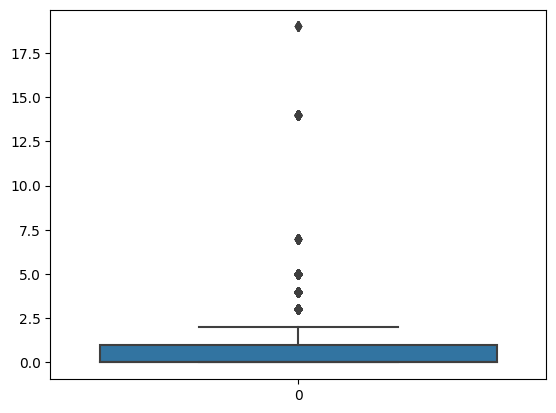

In [20]:
sns.boxplot(dataset_ml['CNT_CHILDREN'])
plt.show()

Siguiente en la lista es asegurarse de transformar los valores negativos de la tabla a valores que tengan una fácil legibilidad para el ojo humano y que nos asegure una mayor comprensión de la información, ésto es convertir las columnas a valores positivos y años en su respectivo espectro de rangos.
. Month_Balance
. Days_birth
. Days_Employed

In [21]:
dataset_ml['MONTHS_BALANCE'] = dataset_ml['MONTHS_BALANCE'].apply(lambda x : abs(x) if x < 0 else x)
dataset_ml['MONTHS_BALANCE']
#El mismo concepto de saldos sigue aplicando a nuestro análisis, siendo la cuenta incremental de saldo deudor igual sólo que al tomar valor absoluto de x se elimina la negativadad.

0          0
1          1
2          2
3          3
4          4
          ..
777710    25
777711    26
777712    27
777713    28
777714    29
Name: MONTHS_BALANCE, Length: 777715, dtype: int64

In [22]:
dataset_ml['DAYS_BIRTH'] = dataset_ml['DAYS_BIRTH'].apply(lambda x : abs(x) if x < 0 else x)
dataset_ml['DAYS_BIRTH'].describe()

count    777715.000000
mean      16124.937046
std        4104.304018
min        7489.000000
25%       12716.000000
50%       15760.000000
75%       19453.000000
max       25152.000000
Name: DAYS_BIRTH, dtype: float64

Crearemos una nueva columna para mejorar la interpretación del analista futuro, llamada 'Years_Total' la cual expondrá la información de 'DAYS_BIRTH' EN formato AA.

In [23]:
dataset_ml['YEARS_TOTAL'] = dataset_ml['DAYS_BIRTH'].apply(lambda x :(x//365))
dataset_ml['YEARS_TOTAL'].describe()

count    777715.000000
mean         43.671326
std          11.247138
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          68.000000
Name: YEARS_TOTAL, dtype: float64

Ahora sí, tiene sentido verificar las edades con estadísticas descriptivas para un mejor análisis de los aplicantes.

In [24]:
dataset_ml['DAYS_EMPLOYED'] = dataset_ml['DAYS_EMPLOYED'].apply(lambda x: abs(x) if x < 0 else x)
print(dataset_ml['DAYS_EMPLOYED'].describe())
print(dataset_ml['DAYS_EMPLOYED'].value_counts())
print(dataset_ml['DAYS_EMPLOYED'].value_counts(normalize=True).head())

count    777715.000000
mean      62424.703960
std      134408.839493
min          17.000000
25%        1259.000000
50%        2684.000000
75%        5819.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64
365243    127972
1751        1601
1539        1545
401         1498
2531        1319
           ...  
3294           1
7049           1
616            1
738            1
2848           1
Name: DAYS_EMPLOYED, Length: 3640, dtype: int64
365243    0.164549
1751      0.002059
1539      0.001987
401       0.001926
2531      0.001696
Name: DAYS_EMPLOYED, dtype: float64


Observando los valores, el máximo valor del dataset y en el que se integra una cantidad grande de valores es un error de carga o de sistema, porque si se divide en años 365243 da un total de 1000 años, algo imposible, ademas se cuenta en 127972 anotaciones, un %16 del dataset está compuesto por ésta anomalía. 

In [25]:
dataset_ml[dataset_ml['DAYS_EMPLOYED'] == 365243].NAME_INCOME_TYPE.value_counts()

2    127972
Name: NAME_INCOME_TYPE, dtype: int64

Si recordamos cuando se cuantificaron las variables cualitativas, el número 2 está ligado a el valor 'Pensioner' o Jubilado en nuestro idioma, lo que explica el fallo en el registro de días y su relativa importancia en el dataset.

In [26]:
dataset_ml

,ID,MONTHS_BALANCE,STATUS,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,YEARS_TOTAL
0,5008804,0,6,0,0,0,427500.0,0,0,0,0,12005,4542,1,1,0,0,0.0,2.0,32
1,5008804,1,6,0,0,0,427500.0,0,0,0,0,12005,4542,1,1,0,0,0.0,2.0,32
2,5008804,2,6,0,0,0,427500.0,0,0,0,0,12005,4542,1,1,0,0,0.0,2.0,32
3,5008804,3,6,0,0,0,427500.0,0,0,0,0,12005,4542,1,1,0,0,0.0,2.0,32
4,5008804,4,6,0,0,0,427500.0,0,0,0,0,12005,4542,1,1,0,0,0.0,2.0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150487,25,6,0,1,0,202500.0,0,1,1,1,19398,2166,1,0,0,0,6.0,2.0,53
777711,5150487,26,6,0,1,0,202500.0,0,1,1,1,19398,2166,1,0,0,0,6.0,2.0,53
777712,5150487,27,6,0,1,0,202500.0,0,1,1,1,19398,2166,1,0,0,0,6.0,2.0,53
777713,5150487,28,6,0,1,0,202500.0,0,1,1,1,19398,2166,1,0,0,0,6.0,2.0,53


Text(0.5, 1.0, 'Data balance between classes')

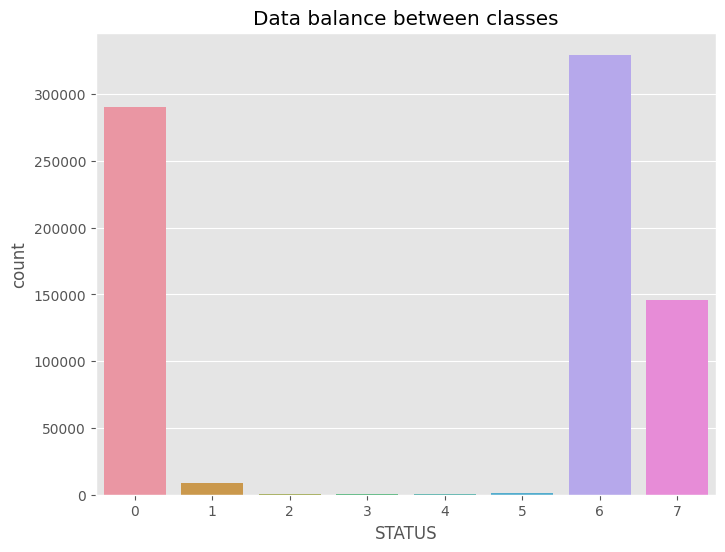

In [27]:
plt.style.use('ggplot')
plt.figure(figsize=[8,6])

sns.countplot(data= dataset_ml, x='STATUS')
plt.title('Data balance between classes')



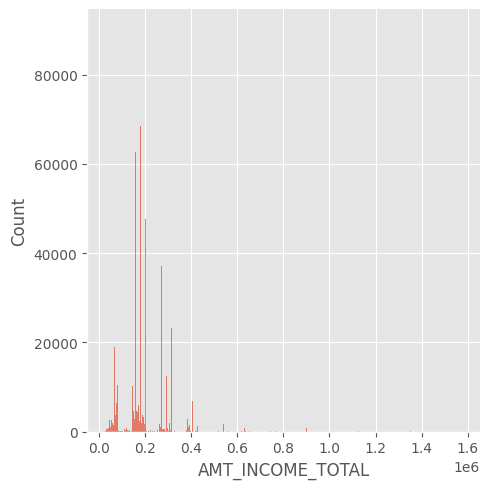

In [28]:
sns.displot(data =dataset_ml,x='AMT_INCOME_TOTAL')

In [29]:
dataset_ml['AMT_INCOME_TOTAL'] = np.log(dataset_ml['AMT_INCOME_TOTAL'])


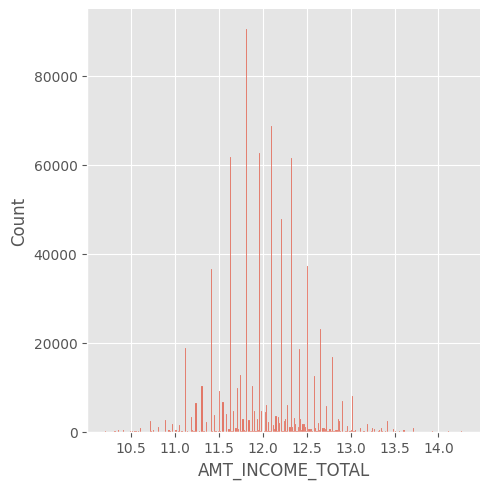

In [30]:
"""Normalización de la distribución de la variable para entrenar un mejor modelo"""
sns.displot(data =dataset_ml,x='AMT_INCOME_TOTAL')

Como ya aclaramos, la 'deuda mala' está entre el rango 1 y 5, porque 0 representa un plazo normal de 1-29 dìas de demora, y 6 y 7 representan pago en el mes corriente(a tiempo) o no hay préstamo actualemente, lo que indica un claro desbalance de los datos y más importante de la etiqueta a predecir, por lo que se deberá usar una técnica para 'balancear' el conjunto de datos y así lograr una mejor base para un modelo que pueda tener mejor capacidad de predecir.

In [31]:
dataset_ml

,ID,MONTHS_BALANCE,STATUS,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,YEARS_TOTAL
0,5008804,0,6,0,0,0,12.965710,0,0,0,0,12005,4542,1,1,0,0,0.0,2.0,32
1,5008804,1,6,0,0,0,12.965710,0,0,0,0,12005,4542,1,1,0,0,0.0,2.0,32
2,5008804,2,6,0,0,0,12.965710,0,0,0,0,12005,4542,1,1,0,0,0.0,2.0,32
3,5008804,3,6,0,0,0,12.965710,0,0,0,0,12005,4542,1,1,0,0,0.0,2.0,32
4,5008804,4,6,0,0,0,12.965710,0,0,0,0,12005,4542,1,1,0,0,0.0,2.0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150487,25,6,0,1,0,12.218495,0,1,1,1,19398,2166,1,0,0,0,6.0,2.0,53
777711,5150487,26,6,0,1,0,12.218495,0,1,1,1,19398,2166,1,0,0,0,6.0,2.0,53
777712,5150487,27,6,0,1,0,12.218495,0,1,1,1,19398,2166,1,0,0,0,6.0,2.0,53
777713,5150487,28,6,0,1,0,12.218495,0,1,1,1,19398,2166,1,0,0,0,6.0,2.0,53


In [46]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import confusion_matrix



In [54]:
X = dataset_ml.drop(columns=['STATUS','ID'], axis=1)
y = dataset_ml['STATUS']

La técnica a implementar iba a ser SMOTEENN, pero presenta un problema a la hora de generar el dataset nuevo, no encontré solución aparente en github porque es una falla del ecosistema imblearn, por lo que elegiré una técnica de SMOTE original, agregando Nearest neighbors, es la forma manual del módulo podría decirse de llegar al mismo resultado.
SMOTE es una herramienta para balancear dateset, 'crea' nuevos datos sintéticos a partir de los provistos, igualando a la clase minoritaria con las que son superiores en cantidad de datos, de ésta forma no estaríamos duplicando valores que no aportan nueva información, sino que ampliamos el espacio de trabajo al crear nueva evidencia sintética pero que ayuda a los modelos de decisión a mejorar sus predicciones.

In [55]:
smote_t = SMOTE(k_neighbors=NearestNeighbors(n_neighbors=5, algorithm="kd_tree"))
X, y = smote_t.fit_resample(X, y)
print(sorted(Counter(y).items()))


[(0, 329536), (1, 329536), (2, 329536), (3, 329536), (4, 329536), (5, 329536), (6, 329536), (7, 329536)]


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [60]:
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(2636288, 18) (1977216, 18) (659072, 18)
(2636288,) (1977216,) (659072,)


In [61]:
np.bincount(y_train)

array([247152, 247152, 247152, 247152, 247152, 247152, 247152, 247152],
      dtype=int64)

In [62]:
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
    model.fit(X_train, y_train)
    print("Accuracy :", model.score(X_test, y_test)*100)
    score = cross_val_score(model, x, y)
    print("Cross Validation Score :", np.mean(score)*100)


In [ ]:
'''from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)'''
#No es el mejor modelo, no enfocaré la fase de manejo de hiperparámetros en regresión logística

'from sklearn.linear_model import LogisticRegression\nmodel = LogisticRegression()\nclassify(model, X, y)'

In [73]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
modelo1 = DecisionTreeClassifier()
classify(modelo1, X, y)


Accuracy : 77.80621844047387
Cross Validation Score : 69.7956371738037


Modificación de Hyperparámetros

In [64]:
modelo2 = DecisionTreeClassifier(criterion='gini')
classify(modelo2, X, y)

Accuracy : 77.80303214216353
Cross Validation Score : 69.77101924381296



Matriz de Confusión


In [75]:
modelo3 = DecisionTreeClassifier()
modelo3.fit(X_train, y_train)
y_pred = modelo3.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm


array([[48992,  5538,   487,   105,   144,   174, 15362, 11582],
       [ 2663, 72231,  3252,   518,   633,   633,  1257,  1197],
       [   30,   922, 71281,  4536,  3545,  2011,    31,    28],
       [    9,    74,  2728, 66509,  8953,  4091,    11,     9],
       [   13,    69,   657,  3627, 72577,  5431,     6,     4],
       [   13,    13,   145,   353,  2579, 79261,     5,    15],
       [20399,  3986,   456,   155,   163,   198, 46772, 10255],
       [13875,  2756,   439,   201,    98,   204,  9676, 55135]],
      dtype=int64)

<AxesSubplot: >

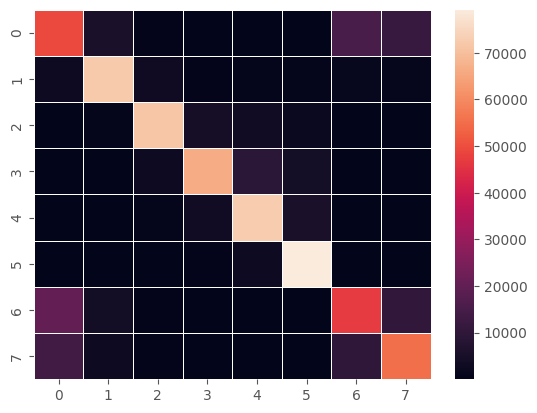

In [76]:
sns.heatmap(cm, annot=False, linewidths=0.5)